# Data Filtering and Selection in Pandas

This notebook covers various techniques to filter and subset data efficiently using pandas. We'll explore different methods from basic comparison operators to advanced filtering techniques.

## Import Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

# For reproducibility
np.random.seed(42)

## Creating Sample Data

Let's create sample DataFrames with various data types including numeric, string, categorical, and datetime data to demonstrate different filtering techniques.

In [2]:
# # Create a sample dataset with different data types
# dates = pd.date_range('2023-01-01', periods=100)
# categories = ['A', 'B', 'C', 'D']
# regions = ['North', 'South', 'East', 'West']
# status = ['Active', 'Pending', 'Completed', 'Cancelled']

# df = pd.DataFrame({
#     'date': dates,
#     'numeric_value': np.random.randint(1, 100, 100),
#     'float_value': np.random.normal(50, 15, 100),
#     'category': np.random.choice(categories, 100),
#     'region': np.random.choice(regions, 100),
#     'status': np.random.choice(status, 100),
#     'text': ['Sample text ' + str(i) for i in range(100)],
#     'is_valid': np.random.choice([True, False], 100)
# })

# # Add some missing values
# for col in df.columns:
#     if col != 'date':  # Keep dates intact
#         mask = np.random.choice([True, False], 100, p=[0.05, 0.95])  # 5% NaN
#         df.loc[mask, col] = np.nan

# # Convert category to categorical data type
# df['category'] = df['category'].astype('category')

# # Display the first few rows of the DataFrame
# print("DataFrame shape:", df.shape)
# df.head()

In [3]:
import pandas as pd
import numpy as np

# Create a sample dataset with different data types
dates = pd.date_range('2023-01-01', periods=100)
categories = ['A', 'B', 'C', 'D']
regions = ['North', 'South', 'East', 'West']
status = ['Active', 'Pending', 'Completed', 'Cancelled']

df = pd.DataFrame({
    'date': dates,
    'numeric_value': np.random.randint(1, 100, 100),
    'float_value': np.random.normal(50, 15, 100),
    'category': np.random.choice(categories, 100),
    'region': np.random.choice(regions, 100),
    'status': np.random.choice(status, 100),
    'text': ['Sample text ' + str(i) for i in range(100)],
    'is_valid': np.random.choice([True, False], 100)
})

# Ensure 'is_valid' column is a nullable boolean type
df['is_valid'] = df['is_valid'].astype('boolean')

# Add some missing values
for col in df.columns:
    if col != 'date':  # Keep dates intact
        mask = np.random.choice([True, False], 100, p=[0.05, 0.95])  # 5% NaN
        df.loc[mask, col] = np.nan

# Convert category to categorical data type
df['category'] = df['category'].astype('category')

# Display the first few rows of the DataFrame
print("DataFrame shape:", df.shape)
df.head()

DataFrame shape: (100, 8)


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
1,2023-01-02,93.0,23.554398,D,South,Cancelled,Sample text 1,False
2,2023-01-03,15.0,54.861260,C,North,Cancelled,NaN,False
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True


## Basic Data Filtering

Pandas provides several ways to filter data. Let's start with the most basic approach using comparison operators (`>`, `<`, `==`, `!=`, `>=`, `<=`).

In [4]:
# Filter rows where numeric_value > 50
high_values = df[df['numeric_value'] > 50]
print(f"Rows with numeric_value > 50: {len(high_values)}")
high_values.head()

Rows with numeric_value > 50: 53


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
1,2023-01-02,93.0,23.554398,D,South,Cancelled,Sample text 1,False
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False


In [5]:
# Filter rows where category equals 'A'
category_a = df[df['category'] == 'A']
print(f"Rows with category 'A': {len(category_a)}")
category_a.head()

Rows with category 'A': 25


,date,numeric_value,float_value,category,region,status,text,is_valid
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
11,2023-01-12,NaN,64.633177,A,West,Pending,Sample text 11,False
21,2023-01-22,60.0,40.323204,A,South,Pending,Sample text 21,False
23,2023-01-24,33.0,73.070548,A,East,Completed,Sample text 23,<NA>
24,2023-01-25,76.0,49.462609,A,West,Active,Sample text 24,True


In [6]:
# Filter rows where status is not 'Completed'
not_completed = df[df['status'] != 'Completed']
print(f"Rows with status not 'Completed': {len(not_completed)}")
not_completed.head()

Rows with status not 'Completed': 82


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
1,2023-01-02,93.0,23.554398,D,South,Cancelled,Sample text 1,False
2,2023-01-03,15.0,54.861260,C,North,Cancelled,NaN,False
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True


In [7]:
# Filter rows by date
recent_data = df[df['date'] >= '2023-03-01']
print(f"Rows with date on or after March 1, 2023: {len(recent_data)}")
recent_data.head()

Rows with date on or after March 1, 2023: 41


,date,numeric_value,float_value,category,region,status,text,is_valid
59,2023-03-01,92.0,52.618667,B,West,Cancelled,Sample text 59,True
60,2023-03-02,NaN,53.863256,B,North,NaN,Sample text 60,False
61,2023-03-03,71.0,NaN,B,West,Active,NaN,False
62,2023-03-04,44.0,21.218432,A,North,Pending,Sample text 62,False
63,2023-03-05,8.0,49.602292,C,West,Active,Sample text 63,False


## Advanced Filtering Techniques

We can combine multiple conditions using logical operators (`&` and `|`). Note that when using multiple conditions, each condition must be enclosed in parentheses.

In [8]:
# Filter with multiple conditions using AND (&)
# Find rows where numeric_value > 50 AND region is 'North'
filtered_df = df[(df['numeric_value'] > 50) & (df['region'] == 'North')]
print(f"Rows matching both conditions: {len(filtered_df)}")
filtered_df.head()

Rows matching both conditions: 9


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False
9,2023-01-10,75.0,45.361814,D,North,Cancelled,Sample text 9,False
10,2023-01-11,88.0,54.968951,C,North,Cancelled,Sample text 10,True
40,2023-02-10,51.0,42.053597,A,North,Active,NaN,True


In [9]:
# Filter with multiple conditions using OR (|)
# Find rows where category is 'A' OR status is 'Completed'
filtered_df = df[(df['category'] == 'A') | (df['status'] == 'Completed')]
print(f"Rows matching either condition: {len(filtered_df)}")
filtered_df.head()

Rows matching either condition: 38


,date,numeric_value,float_value,category,region,status,text,is_valid
5,2023-01-06,21.0,59.175144,B,West,Completed,NaN,False
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
11,2023-01-12,NaN,64.633177,A,West,Pending,Sample text 11,False
12,2023-01-13,3.0,42.812386,D,East,Completed,Sample text 12,True
13,2023-01-14,22.0,47.215115,D,North,Completed,Sample text 13,True


In [10]:
# Combining AND and OR conditions
# Find rows where (numeric_value > 50 AND region is 'North') OR category is 'A'
complex_filter = df[((df['numeric_value'] > 50) & (df['region'] == 'North')) | (df['category'] == 'A')]
print(f"Rows matching complex condition: {len(complex_filter)}")
complex_filter.head()

Rows matching complex condition: 33


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
9,2023-01-10,75.0,45.361814,D,North,Cancelled,Sample text 9,False
10,2023-01-11,88.0,54.968951,C,North,Cancelled,Sample text 10,True


## Boolean Indexing

Boolean indexing is a powerful technique where you create a boolean mask (Series of True/False values) and apply it to filter the DataFrame.

In [11]:
# Create a boolean mask
mask = df['float_value'] > 60
print("First 10 values of the mask:")
print(mask.head(10))

# Apply the mask to filter the DataFrame
filtered_df = df[mask]
print(f"\nNumber of rows with float_value > 60: {len(filtered_df)}")
filtered_df.head()

First 10 values of the mask:
0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8    False
9    False
Name: float_value, dtype: bool

Number of rows with float_value > 60: 22


,date,numeric_value,float_value,category,region,status,text,is_valid
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
11,2023-01-12,NaN,64.633177,A,West,Pending,Sample text 11,False
16,2023-01-17,88.0,62.187887,D,West,Cancelled,Sample text 16,False
17,2023-01-18,30.0,70.343600,B,South,Cancelled,Sample text 17,<NA>


In [12]:
# Creating and applying a more complex mask
mask = (df['numeric_value'] > 50) & (df['float_value'] < 70) & (df['is_valid'] == True)
filtered_df = df[mask]
print(f"Rows matching the complex mask: {len(filtered_df)}")
filtered_df.head()

Rows matching the complex mask: 24


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
10,2023-01-11,88.0,54.968951,C,North,Cancelled,Sample text 10,True
20,2023-01-21,64.0,55.424540,B,East,Cancelled,Sample text 20,True


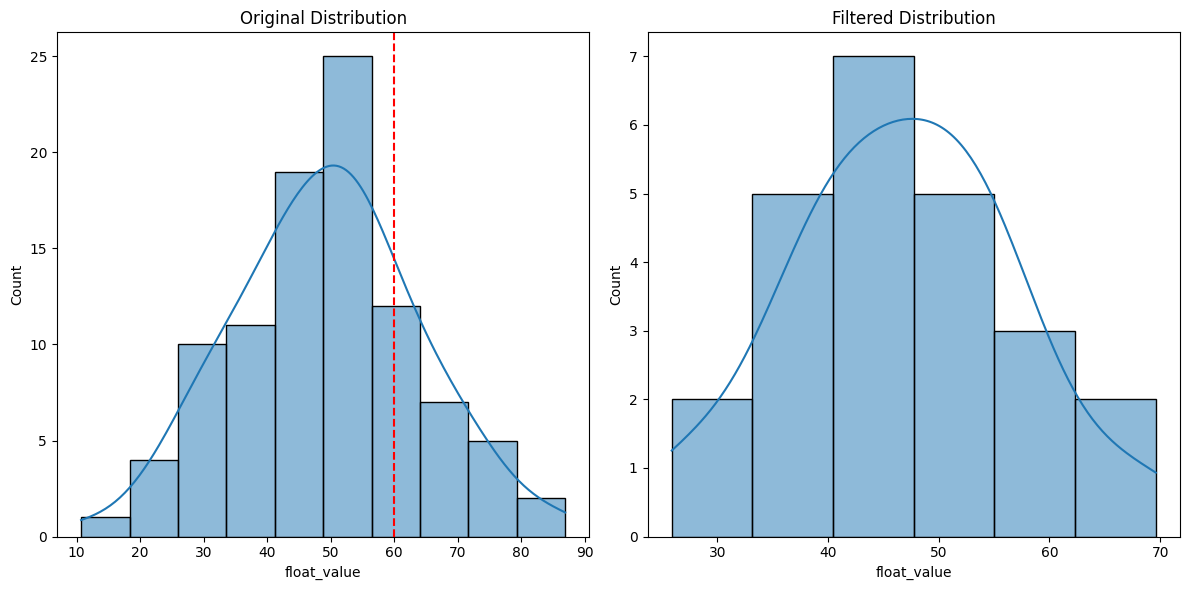

In [13]:
# Visualizing the distribution of data before and after filtering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['float_value'], kde=True)
plt.title('Original Distribution')
plt.axvline(x=60, color='red', linestyle='--')

plt.subplot(1, 2, 2)
sns.histplot(filtered_df['float_value'], kde=True)
plt.title('Filtered Distribution')

plt.tight_layout()
plt.show()

## Using Query Method

The `query()` method provides a more readable way to filter data, especially for complex conditions. It accepts string expressions and is often more concise than boolean indexing.

In [14]:
# Basic query
filtered_df = df.query('numeric_value > 50')
print(f"Rows with numeric_value > 50: {len(filtered_df)}")
filtered_df.head()

Rows with numeric_value > 50: 53


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
1,2023-01-02,93.0,23.554398,D,South,Cancelled,Sample text 1,False
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False


In [15]:
# More complex query with multiple conditions
filtered_df = df.query('numeric_value > 50 and region == "North"')
print(f"Rows matching the complex query: {len(filtered_df)}")
filtered_df.head()

Rows matching the complex query: 9


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False
9,2023-01-10,75.0,45.361814,D,North,Cancelled,Sample text 9,False
10,2023-01-11,88.0,54.968951,C,North,Cancelled,Sample text 10,True
40,2023-02-10,51.0,42.053597,A,North,Active,NaN,True


In [16]:
# Using OR conditions in query
filtered_df = df.query('category == "A" or status == "Completed"')
print(f"Rows matching either condition: {len(filtered_df)}")
filtered_df.head()

Rows matching either condition: 38


,date,numeric_value,float_value,category,region,status,text,is_valid
5,2023-01-06,21.0,59.175144,B,West,Completed,NaN,False
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
11,2023-01-12,NaN,64.633177,A,West,Pending,Sample text 11,False
12,2023-01-13,3.0,42.812386,D,East,Completed,Sample text 12,True
13,2023-01-14,22.0,47.215115,D,North,Completed,Sample text 13,True


In [17]:
# Using variables in query with @ symbol
min_value = 70
max_value = 90
filtered_df = df.query('numeric_value >= @min_value and numeric_value <= @max_value')
print(f"Rows with numeric_value between {min_value} and {max_value}: {len(filtered_df)}")
filtered_df.head()

Rows with numeric_value between 70 and 90: 25


,date,numeric_value,float_value,category,region,status,text,is_valid
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
8,2023-01-09,75.0,37.411737,D,East,Active,Sample text 8,False
9,2023-01-10,75.0,45.361814,D,North,Cancelled,Sample text 9,False


## Filtering with isin()

The `isin()` method lets you filter rows where values are in a specified list or set of values.

In [18]:
# Filter rows where category is either 'A' or 'B'
categories_of_interest = ['A', 'B']
filtered_df = df[df['category'].isin(categories_of_interest)]
print(f"Rows with category in {categories_of_interest}: {len(filtered_df)}")
filtered_df.head()

Rows with category in ['A', 'B']: 46


,date,numeric_value,float_value,category,region,status,text,is_valid
5,2023-01-06,21.0,59.175144,B,West,Completed,NaN,False
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
11,2023-01-12,NaN,64.633177,A,West,Pending,Sample text 11,False
17,2023-01-18,30.0,70.343600,B,South,Cancelled,Sample text 17,<NA>
20,2023-01-21,64.0,55.424540,B,East,Cancelled,Sample text 20,True


In [19]:
# Filter rows where region is NOT 'North' or 'South'
regions_to_exclude = ['North', 'South']
filtered_df = df[~df['region'].isin(regions_to_exclude)]  # Note the ~ operator for negation
print(f"Rows with region NOT in {regions_to_exclude}: {len(filtered_df)}")
filtered_df.head()

Rows with region NOT in ['North', 'South']: 49


,date,numeric_value,float_value,category,region,status,text,is_valid
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True
5,2023-01-06,21.0,59.175144,B,West,Completed,NaN,False
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
8,2023-01-09,75.0,37.411737,D,East,Active,Sample text 8,False


In [20]:
# Combine isin() with other conditions
filtered_df = df[(df['category'].isin(['A', 'B'])) & (df['numeric_value'] > 50)]
print(f"Rows matching combined conditions: {len(filtered_df)}")
filtered_df.head()

Rows matching combined conditions: 23


,date,numeric_value,float_value,category,region,status,text,is_valid
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
20,2023-01-21,64.0,55.424540,B,East,Cancelled,Sample text 20,True
21,2023-01-22,60.0,40.323204,A,South,Pending,Sample text 21,False
24,2023-01-25,76.0,49.462609,A,West,Active,Sample text 24,True
25,2023-01-26,58.0,73.469655,B,South,NaN,Sample text 25,False


## String Filtering with str Accessor

The `.str` accessor provides string manipulation methods for filtering text data.

In [21]:
# # Filter rows where text contains the word 'text'
# filtered_df = df[df['text'].str.contains('text')]
# print(f"Rows where text contains 'text': {len(filtered_df)}")
# filtered_df.head()

# Filter rows where text contains the word 'text'
filtered_df = df[df['text'].str.contains('text', na=False)]
print(f"Rows where text contains 'text': {len(filtered_df)}")
filtered_df.head()

Rows where text contains 'text': 93


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
1,2023-01-02,93.0,23.554398,D,South,Cancelled,Sample text 1,False
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False


In [22]:
# # Filter rows where text starts with 'Sample'
# filtered_df = df[df['text'].str.startswith('Sample')]
# print(f"Rows where text starts with 'Sample': {len(filtered_df)}")
# filtered_df.head()

# Filter rows where text starts with 'Sample'
filtered_df = df[df['text'].str.startswith('Sample', na=False)]
print(f"Rows where text starts with 'Sample': {len(filtered_df)}")
filtered_df.head()

Rows where text starts with 'Sample': 93


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
1,2023-01-02,93.0,23.554398,D,South,Cancelled,Sample text 1,False
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False


In [23]:
# # Filter rows where text ends with specific numbers
# filtered_df = df[df['text'].str.endswith(('1', '2', '3'))]
# print(f"Rows where text ends with '1', '2', or '3': {len(filtered_df)}")
# filtered_df.head()

# Filter rows where text ends with specific numbers
filtered_df = df[df['text'].str.endswith(('1', '2', '3'), na=False)]
print(f"Rows where text ends with '1', '2', or '3': {len(filtered_df)}")
filtered_df.head()

Rows where text ends with '1', '2', or '3': 28


,date,numeric_value,float_value,category,region,status,text,is_valid
1,2023-01-02,93.0,23.554398,D,South,Cancelled,Sample text 1,False
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
11,2023-01-12,NaN,64.633177,A,West,Pending,Sample text 11,False
12,2023-01-13,3.0,42.812386,D,East,Completed,Sample text 12,True
13,2023-01-14,22.0,47.215115,D,North,Completed,Sample text 13,True


In [24]:
# # Using regex with str.contains()
# import re
# # Filter rows where text contains a number between 10 and 20
# filtered_df = df[df['text'].str.contains(r'Sample text 1[0-9]')]
# print(f"Rows where text contains numbers 10-19: {len(filtered_df)}")
# filtered_df

# # Using regex with str.contains()
import re
# Filter rows where text contains a number between 10 and 19
filtered_df = df[df['text'].str.contains(r'Sample text 1[0-9]', na=False)]
print(f"Rows where text contains numbers 10-19: {len(filtered_df)}")
filtered_df

Rows where text contains numbers 10-19: 10


,date,numeric_value,float_value,category,region,status,text,is_valid
10,2023-01-11,88.0,54.968951,C,North,Cancelled,Sample text 10,True
11,2023-01-12,NaN,64.633177,A,West,Pending,Sample text 11,False
12,2023-01-13,3.0,42.812386,D,East,Completed,Sample text 12,True
13,2023-01-14,22.0,47.215115,D,North,Completed,Sample text 13,True
14,2023-01-15,53.0,33.404975,NaN,West,Completed,Sample text 14,False
15,2023-01-16,2.0,32.056901,D,East,Cancelled,Sample text 15,False
16,2023-01-17,88.0,62.187887,D,West,Cancelled,Sample text 16,False
17,2023-01-18,30.0,70.343600,B,South,Cancelled,Sample text 17,<NA>
18,2023-01-19,38.0,NaN,C,North,Active,Sample text 18,True
19,2023-01-20,2.0,NaN,D,South,Pending,Sample text 19,False


## Filtering with loc and iloc

`loc` is used for label-based indexing, while `iloc` is used for integer-position-based indexing.

In [25]:
# Select rows by index and columns by label using loc
# Get rows with indices 5 to 10 and columns 'date', 'numeric_value', 'category'
subset = df.loc[5:10, ['date', 'numeric_value', 'category']]
subset

,date,numeric_value,category
5,2023-01-06,21.0,B
6,2023-01-07,83.0,D
7,2023-01-08,87.0,A
8,2023-01-09,75.0,D
9,2023-01-10,75.0,D
10,2023-01-11,88.0,C


In [26]:
# Combine loc with boolean indexing
# Select specific columns for rows where numeric_value > 50
subset = df.loc[df['numeric_value'] > 50, ['date', 'numeric_value', 'category', 'region']]
print(f"Shape of subset: {subset.shape}")
subset.head()

Shape of subset: (53, 4)


,date,numeric_value,category,region
0,2023-01-01,52.0,D,North
1,2023-01-02,93.0,D,South
3,2023-01-04,72.0,NaN,East
4,2023-01-05,61.0,D,East
6,2023-01-07,83.0,D,North


In [27]:
# Using iloc for position-based selection
# Get first 5 rows and first 3 columns
subset = df.iloc[0:5, 0:3]
subset

,date,numeric_value,float_value
0,2023-01-01,52.0,55.154274
1,2023-01-02,93.0,23.554398
2,2023-01-03,15.0,54.861260
3,2023-01-04,72.0,44.223766
4,2023-01-05,61.0,39.846170


In [28]:
# Combining iloc with specific positions
# Get rows at positions 10, 20, 30 and columns at positions 1, 3, 5
subset = df.iloc[[10, 20, 30], [1, 3, 5]]
subset

,numeric_value,category,status
10,88.0,C,Cancelled
20,64.0,B,Cancelled
30,59.0,B,Completed


## Combining Multiple Filters

Let's explore different ways to chain and combine multiple filtering operations.

In [29]:
# Method 1: Chaining filters
filtered_df = df[df['numeric_value'] > 50][df['category'] == 'A']
print(f"Rows after chaining filters: {len(filtered_df)}")
filtered_df.head()

Rows after chaining filters: 10


C:\Users\pavel\AppData\Local\Temp\ipykernel_13220\395537505.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df['numeric_value'] > 50][df['category'] == 'A']


,date,numeric_value,float_value,category,region,status,text,is_valid
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
21,2023-01-22,60.0,40.323204,A,South,Pending,Sample text 21,False
24,2023-01-25,76.0,49.462609,A,West,Active,Sample text 24,True
33,2023-02-03,60.0,55.356689,A,East,Pending,Sample text 33,True
34,2023-02-04,80.0,72.168411,A,East,Active,Sample text 34,<NA>


The warning you're seeing occurs because you're chaining multiple filters on the DataFrame, which can cause a mismatch in indexing. Specifically, after applying the first condition (df['numeric_value'] > 50), the resulting DataFrame doesn't retain the original index for the second condition (df['category'] == 'A'), and this mismatch triggers the warning.

To resolve the warning and improve the readability of your code, you can combine the conditions into a single filter instead of chaining them. This way, the filtering happens in one step, and there's no risk of index reindexing.

This approach uses the **bitwise & operator** to combine the two conditions in a single filtering step. This should eliminate the warning and make your code more efficient.

In [30]:
# Method 1: Combine conditions into one filter
filtered_df = df[(df['numeric_value'] > 50) & (df['category'] == 'A')]
print(f"Rows after combined filter: {len(filtered_df)}")
filtered_df.head()

Rows after combined filter: 10


,date,numeric_value,float_value,category,region,status,text,is_valid
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
21,2023-01-22,60.0,40.323204,A,South,Pending,Sample text 21,False
24,2023-01-25,76.0,49.462609,A,West,Active,Sample text 24,True
33,2023-02-03,60.0,55.356689,A,East,Pending,Sample text 33,True
34,2023-02-04,80.0,72.168411,A,East,Active,Sample text 34,<NA>


In [31]:
# Method 2: Using & operator (generally preferred for clarity and performance)
filtered_df = df[(df['numeric_value'] > 50) & (df['category'] == 'A')]
print(f"Rows using & operator: {len(filtered_df)}")
filtered_df.head()

Rows using & operator: 10


,date,numeric_value,float_value,category,region,status,text,is_valid
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
21,2023-01-22,60.0,40.323204,A,South,Pending,Sample text 21,False
24,2023-01-25,76.0,49.462609,A,West,Active,Sample text 24,True
33,2023-02-03,60.0,55.356689,A,East,Pending,Sample text 33,True
34,2023-02-04,80.0,72.168411,A,East,Active,Sample text 34,<NA>


In [32]:
# Method 3: Using query method
filtered_df = df.query('numeric_value > 50 and category == "A"')
print(f"Rows using query method: {len(filtered_df)}")
filtered_df.head()

Rows using query method: 10


,date,numeric_value,float_value,category,region,status,text,is_valid
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
21,2023-01-22,60.0,40.323204,A,South,Pending,Sample text 21,False
24,2023-01-25,76.0,49.462609,A,West,Active,Sample text 24,True
33,2023-02-03,60.0,55.356689,A,East,Pending,Sample text 33,True
34,2023-02-04,80.0,72.168411,A,East,Active,Sample text 34,<NA>


In [33]:
# Complex filtering example
# Find rows where:
# - numeric_value is between 40 and 80
# - category is either A or B
# - region is not West
# - date is after February 15, 2023

complex_filter = df[
    (df['numeric_value'] > 40) & 
    (df['numeric_value'] < 80) & 
    (df['category'].isin(['A', 'B'])) & 
    (df['region'] != 'West') & 
    (df['date'] > '2023-02-15')
]

print(f"Rows matching complex filter: {len(complex_filter)}")
complex_filter.head()

Rows matching complex filter: 5


,date,numeric_value,float_value,category,region,status,text,is_valid
62,2023-03-04,44.0,21.218432,A,North,Pending,Sample text 62,False
69,2023-03-11,50.0,32.469829,A,East,Completed,Sample text 69,False
86,2023-03-28,48.0,36.208636,A,South,NaN,Sample text 86,False
89,2023-03-31,78.0,45.169077,B,North,Active,Sample text 89,True
91,2023-04-02,62.0,31.537035,B,South,Cancelled,Sample text 91,False


In [34]:
# Same filter using query method
complex_query = df.query(
    'numeric_value > 40 and '
    'numeric_value < 80 and '
    'category in ["A", "B"] and '
    'region != "West" and '
    'date > "2023-02-15"'
)

print(f"Rows matching complex query: {len(complex_query)}")
complex_query.head()

# Verify that both methods give the same result
print(f"Results are identical: {complex_filter.equals(complex_query)}")

Rows matching complex query: 5
Results are identical: True


## Date and Time Filtering

Let's explore techniques for filtering data based on date and time fields.

In [35]:
# Basic date filtering
start_date = '2023-02-01'
end_date = '2023-03-31'

date_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
print(f"Rows between {start_date} and {end_date}: {len(date_filtered)}")
date_filtered.head()

Rows between 2023-02-01 and 2023-03-31: 59


,date,numeric_value,float_value,category,region,status,text,is_valid
31,2023-02-01,42.0,20.186466,C,East,Pending,Sample text 31,True
32,2023-02-02,92.0,46.704922,NaN,South,Active,Sample text 32,True
33,2023-02-03,60.0,55.356689,A,East,Pending,Sample text 33,True
34,2023-02-04,80.0,72.168411,A,East,Active,Sample text 34,<NA>
35,2023-02-05,15.0,42.225947,D,South,Pending,Sample text 35,True


In [36]:
# Using datetime properties to filter
# Filter for days that are weekends (Saturday or Sunday)
weekend_data = df[df['date'].dt.dayofweek.isin([5, 6])]  # 5=Saturday, 6=Sunday
print(f"Rows falling on weekends: {len(weekend_data)}")
weekend_data.head()

Rows falling on weekends: 29


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True
13,2023-01-14,22.0,47.215115,D,North,Completed,Sample text 13,True
14,2023-01-15,53.0,33.404975,NaN,West,Completed,Sample text 14,False


In [37]:
# Filter by month
march_data = df[df['date'].dt.month == 3]  # March
print(f"Rows from March: {len(march_data)}")
march_data.head()

Rows from March: 31


,date,numeric_value,float_value,category,region,status,text,is_valid
59,2023-03-01,92.0,52.618667,B,West,Cancelled,Sample text 59,True
60,2023-03-02,NaN,53.863256,B,North,NaN,Sample text 60,False
61,2023-03-03,71.0,NaN,B,West,Active,NaN,False
62,2023-03-04,44.0,21.218432,A,North,Pending,Sample text 62,False
63,2023-03-05,8.0,49.602292,C,West,Active,Sample text 63,False


In [38]:
# Complex date filtering
# Get data for Mondays in February with numeric_value > 50
monday_feb_data = df[
    (df['date'].dt.month == 2) &  # February
    (df['date'].dt.dayofweek == 0) &  # Monday
    (df['numeric_value'] > 50)
]
print(f"Mondays in February with numeric_value > 50: {len(monday_feb_data)}")
monday_feb_data

Mondays in February with numeric_value > 50: 1


,date,numeric_value,float_value,category,region,status,text,is_valid
36,2023-02-06,62.0,37.872596,A,South,Completed,Sample text 36,True


## Numeric Data Filtering

Let's look at specific techniques for filtering numeric data.

In [39]:
# Using between() method for range filtering
range_filtered = df[df['numeric_value'].between(40, 60)]
print(f"Rows with numeric_value between 40 and 60: {len(range_filtered)}")
range_filtered.head()

Rows with numeric_value between 40 and 60: 23


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
14,2023-01-15,53.0,33.404975,NaN,West,Completed,Sample text 14,False
21,2023-01-22,60.0,40.323204,A,South,Pending,Sample text 21,False
25,2023-01-26,58.0,73.469655,B,South,NaN,Sample text 25,False
28,2023-01-29,49.0,51.305706,B,West,Cancelled,Sample text 28,False


In [40]:
# Filtering based on quantiles
q1 = df['float_value'].quantile(0.25)
q3 = df['float_value'].quantile(0.75)
iqr = q3 - q1

middle_range = df[(df['float_value'] >= q1) & (df['float_value'] <= q3)]
print(f"Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")
print(f"Rows with float_value in middle 50% (between Q1 and Q3): {len(middle_range)}")
middle_range.head()

Q1: 39.75, Q3: 57.97, IQR: 18.22
Rows with float_value in middle 50% (between Q1 and Q3): 48


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
2,2023-01-03,15.0,54.861260,C,North,Cancelled,NaN,False
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True
9,2023-01-10,75.0,45.361814,D,North,Cancelled,Sample text 9,False


In [41]:
# Identifying outliers using IQR
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['float_value'] < lower_bound) | (df['float_value'] > upper_bound)]
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)}")
outliers.head()

Lower bound: 12.42, Upper bound: 85.31
Number of outliers: 2


,date,numeric_value,float_value,category,region,status,text,is_valid
26,2023-01-27,22.0,10.703823,D,West,Completed,Sample text 26,False
65,2023-03-07,35.0,86.948632,D,South,Completed,Sample text 65,True


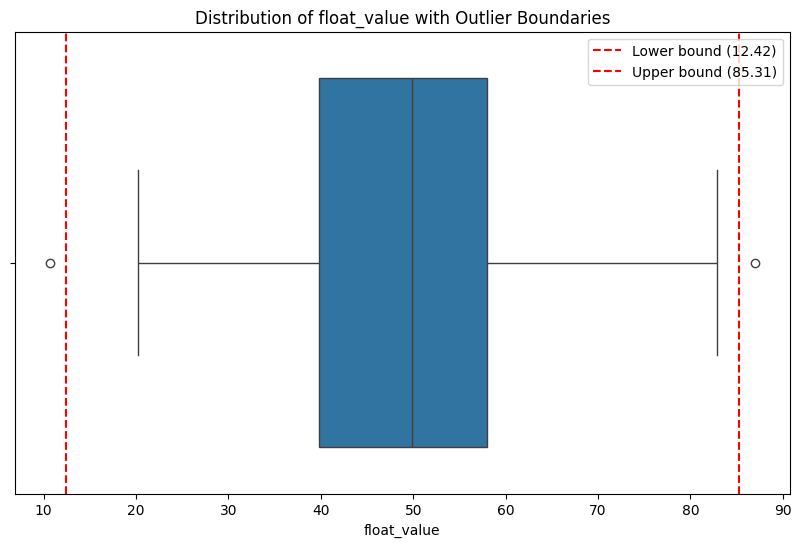

In [42]:
# Visualizing the distribution with outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['float_value'])
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower bound ({lower_bound:.2f})')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper bound ({upper_bound:.2f})')
plt.legend()
plt.title('Distribution of float_value with Outlier Boundaries')
plt.show()

## Handling NaN Values in Filters

Missing values (NaN) require special handling in filtering operations.

In [43]:
# Count missing values in each column
missing_values = df.isna().sum()
print("Missing values by column:")
missing_values

Missing values by column:


date             0
numeric_value    5
float_value      4
category         4
region           2
status           6
text             7
is_valid         7
dtype: int64

In [44]:
# Filter rows with missing numeric_value
missing_numeric = df[df['numeric_value'].isna()]
print(f"Rows with missing numeric_value: {len(missing_numeric)}")
missing_numeric.head()

Rows with missing numeric_value: 5


,date,numeric_value,float_value,category,region,status,text,is_valid
11,2023-01-12,NaN,64.633177,A,West,Pending,Sample text 11,False
60,2023-03-02,NaN,53.863256,B,North,NaN,Sample text 60,False
74,2023-03-16,NaN,71.041915,D,South,Pending,Sample text 74,True
76,2023-03-18,NaN,58.802856,A,East,Active,Sample text 76,<NA>
90,2023-04-01,NaN,62.202758,A,West,Completed,Sample text 90,False


In [45]:
# Filter rows with no missing values in any column
complete_rows = df.dropna()
print(f"Rows with no missing values: {len(complete_rows)}")
print(f"Original DataFrame shape: {df.shape}")
complete_rows.head()

Rows with no missing values: 70
Original DataFrame shape: (100, 8)


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
1,2023-01-02,93.0,23.554398,D,South,Cancelled,Sample text 1,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False
7,2023-01-08,87.0,63.969202,A,West,Pending,Sample text 7,True


In [46]:
# Filter rows that have at least 6 non-null values
mostly_complete_rows = df.dropna(thresh=6)
print(f"Rows with at least 6 non-null values: {len(mostly_complete_rows)}")
mostly_complete_rows.head()

Rows with at least 6 non-null values: 100


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
1,2023-01-02,93.0,23.554398,D,South,Cancelled,Sample text 1,False
2,2023-01-03,15.0,54.861260,C,North,Cancelled,NaN,False
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True


In [47]:
# Filling NaN values before filtering
# Fill NaN in numeric_value with the median
median_value = df['numeric_value'].median()
filled_df = df.copy()
filled_df['numeric_value'] = filled_df['numeric_value'].fillna(median_value)

# Now filter with no NaN issues
filtered_with_filled = filled_df[filled_df['numeric_value'] > 50]
print(f"Rows after filling NaNs and filtering: {len(filtered_with_filled)}")
filtered_with_filled.head()

Rows after filling NaNs and filtering: 58


,date,numeric_value,float_value,category,region,status,text,is_valid
0,2023-01-01,52.0,55.154274,D,North,Active,Sample text 0,True
1,2023-01-02,93.0,23.554398,D,South,Cancelled,Sample text 1,False
3,2023-01-04,72.0,44.223766,NaN,East,Cancelled,Sample text 3,False
4,2023-01-05,61.0,39.846170,D,East,Active,Sample text 4,True
6,2023-01-07,83.0,65.464993,D,North,Cancelled,Sample text 6,False


## Performance Considerations

Different filtering methods can have varying performance implications, especially with large datasets.

In [48]:
# Create a larger DataFrame for performance testing
large_df = pd.DataFrame({
    'A': np.random.randint(1, 100, 1000000),
    'B': np.random.choice(['X', 'Y', 'Z'], 1000000),
    'C': np.random.normal(0, 1, 1000000)
})

large_df.head()

,A,B,C
0,90,Z,0.532431
1,41,Y,0.631694
2,3,X,0.746522
3,6,X,0.671844
4,5,Y,0.405980


In [49]:
# Compare performance of different filtering methods
import time

# Method 1: Boolean indexing
start_time = time.time()
filtered_1 = large_df[large_df['A'] > 50]
time_1 = time.time() - start_time

# Method 2: Query method
start_time = time.time()
filtered_2 = large_df.query('A > 50')
time_2 = time.time() - start_time

# Method 3: NumPy where + loc
start_time = time.time()
mask = np.where(large_df['A'] > 50)[0]
filtered_3 = large_df.iloc[mask]
time_3 = time.time() - start_time

print(f"Boolean indexing time: {time_1:.5f} seconds")
print(f"Query method time: {time_2:.5f} seconds")
print(f"NumPy where + iloc time: {time_3:.5f} seconds")

Boolean indexing time: 0.02496 seconds
Query method time: 0.03279 seconds
NumPy where + iloc time: 0.01454 seconds


In [50]:
# Compare performance for complex filters
start_time = time.time()
filtered_1 = large_df[(large_df['A'] > 50) & (large_df['B'] == 'X') & (large_df['C'] > 0)]
time_1 = time.time() - start_time

start_time = time.time()
filtered_2 = large_df.query('A > 50 and B == "X" and C > 0')
time_2 = time.time() - start_time

print(f"Complex boolean indexing time: {time_1:.5f} seconds")
print(f"Complex query method time: {time_2:.5f} seconds")
print(f"Number of rows in result: {len(filtered_1)}")

Complex boolean indexing time: 0.07770 seconds
Complex query method time: 0.04015 seconds
Number of rows in result: 82048


## Summary and Best Practices

Here's a summary of the filtering techniques we've covered and some best practices:

1. **Basic Filtering**:
   - Use comparison operators (`>`, `<`, `==`, etc.) for simple conditions
   - Enclose multiple conditions in parentheses when using `&` and `|`

2. **Boolean Indexing**:
   - Create boolean masks with conditions and apply them to filter DataFrames
   - Great for complex conditions and reusable filters

3. **Query Method**:
   - More readable for complex conditions 
   - Can be more efficient for larger datasets
   - Use `@` to reference external variables

4. **isin() Method**:
   - Efficient for checking membership in lists of values
   - Use `~` to negate the condition

5. **String Filtering**:
   - Use the `.str` accessor with methods like `contains()`, `startswith()`, etc.
   - Support for regex patterns with `contains()`

6. **Loc and Iloc**:
   - `loc` for label-based indexing
   - `iloc` for integer position-based indexing
   - Combine with boolean masks for powerful subsetting

7. **Date Filtering**:
   - Use date properties with `.dt` accessor
   - Compare with date strings or datetime objects

8. **Handling NaN Values**:
   - Use `isna()` and `notna()` to identify missing values
   - Consider filling NaN values before filtering
   - Use `dropna()` with appropriate parameters

9. **Performance Tips**:
   - The `query()` method can be faster for large datasets
   - Avoid chaining multiple filters when possible
   - Consider using NumPy filtering for very large datasets